In [2]:
import numpy as np
from src.load_data import loader
lo = loader()
import pandas as pd

In [3]:
dl = list(np.load('data/loadings/dep_loadings.npy'))
ml = list(np.load('data/loadings/mod_loadings.npy'))
dl_u = []
for l in dl:
    dl_u.append(list([0 if abs(i)<0.3 else i for i in l]))
dl_u = np.array(dl_u)
ml_u = []
for l in ml:
    ml_u.append(list([0 if abs(i)<0.3 else i for i in l]))
ml_u = np.array(ml_u)

In [4]:
print(dl_u)
print(ml_u)

[[0.         0.         0.79503661]
 [0.         0.         0.6614732 ]
 [0.         0.         0.63514259]
 [0.         0.         0.85518148]
 [0.83142334 0.         0.        ]
 [0.63486375 0.         0.        ]
 [0.86359627 0.         0.        ]
 [0.82513137 0.         0.        ]
 [0.         0.91969758 0.        ]
 [0.         0.9048804  0.        ]
 [0.         0.74961177 0.        ]]
[[0.         0.         0.         0.494613  ]
 [0.8875511  0.         0.         0.        ]
 [0.99208919 0.         0.         0.        ]
 [0.78942875 0.         0.         0.        ]
 [0.         0.85719553 0.         0.        ]
 [0.         0.85636385 0.         0.        ]
 [0.         0.81430671 0.         0.        ]
 [0.         0.         0.3335071  0.        ]
 [0.         0.         0.69429195 0.        ]
 [0.         0.         0.84204496 0.        ]
 [0.         0.         0.         0.        ]]


In [5]:
deps, mods = lo.load_data()
cdeps = pd.concat(list(deps.values()), axis=1)
cmods = pd.concat(list(mods.values()), axis=1)

In [6]:
print(cdeps)

     Trustworthy  Honesty  Ability  OverallTrust  Thinking  Contemplated   
0              6        6        6             6         1             1  \
1              7        7        7             7         1             1   
2              7        7        7             7         4             3   
3              5        7        3             5         5             5   
4              7        6        7             6         2             2   
..           ...      ...      ...           ...       ...           ...   
272            7        7        7             7         1             1   
273            6        7        5             6         2             1   
274            5        5        4             5         3             5   
275            7        7        5             7         5             5   
276            4        4        4             5         4             3   

     Demanding  Effort  helpfulness  usefulness  informative  
0            1       1  

In [12]:
from matplotlib import pyplot as plt

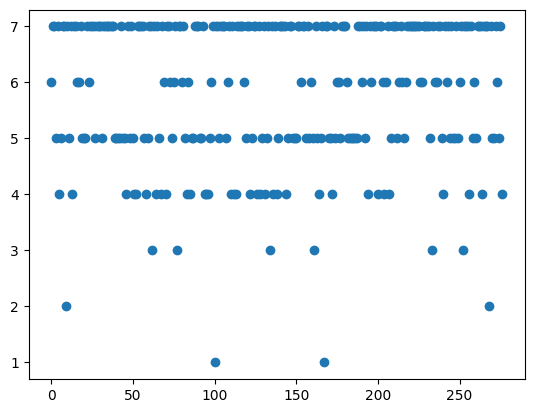

In [16]:
plt.scatter(cdeps.index, cdeps['Trustworthy'])

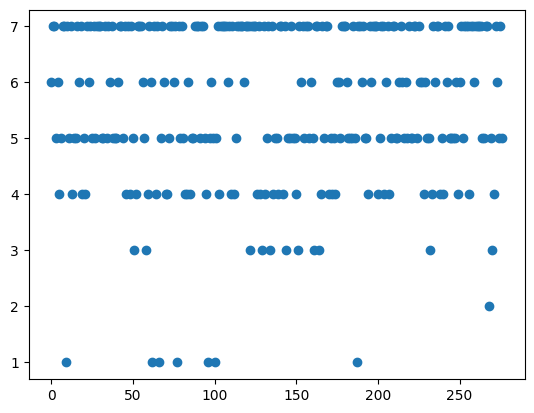

In [17]:
plt.scatter(cdeps.index, cdeps['OverallTrust'])

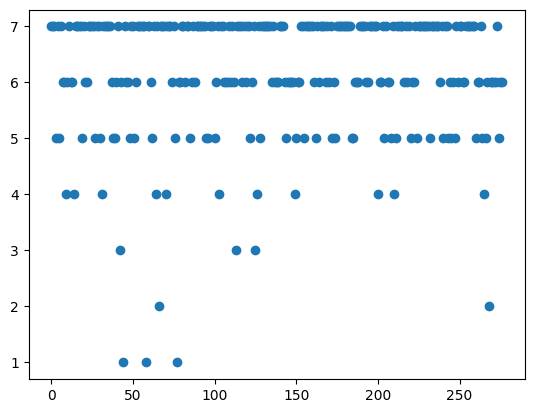

In [18]:
plt.scatter(cdeps.index, cdeps['helpfulness'])

In [7]:
deps_weights = np.dot(cdeps, dl_u)
mods_weights = np.dot(cmods, ml_u)
# print(mods_weights)

In [10]:
print(deps_weights)

[[ 3.15501473 18.01932828 17.6810033 ]
 [ 4.80527748 18.01932828 20.62783718]
 [ 7.74414362 18.01932828 20.62783718]
 [10.74735562 14.52544095 14.78683063]
 [ 6.31002946 18.01932828 19.1111825 ]
 [ 4.81786141 14.52544095 13.13661255]
 [ 9.46504419 18.01932828 14.73416942]
 [ 9.08450894 16.1947503  18.7224094 ]
 [ 4.42474223 15.44513853 20.62783718]
 [ 7.79562057  8.64226685  4.37701309]
 [13.26121463 14.69552676 20.62783718]
 [13.26121463 18.01932828 14.09902682]
 [ 3.15501473 15.44513853 19.30489078]
 [ 9.08450894 15.44513853 11.81366614]
 [ 9.85816337 11.95125119 16.37690385]
 [ 6.11346987 18.01932828 17.64718904]
 [11.61095188 18.01932828 17.90104218]
 [ 7.9602922  18.01932828 17.6810033 ]
 [13.00688613 18.01932828 16.65899797]
 [11.59836795 12.87094877 13.21751474]
 [10.73477169 18.01932828 14.73416942]
 [ 9.46504419 15.44513853 13.24384535]
 [ 6.72245266 15.44513853 20.62783718]
 [10.73477169 18.01932828 17.6810033 ]
 [ 5.05960598 18.01932828 18.03460559]
 [12.39761836 18.01932828

In [8]:
dfdeps = pd.DataFrame(deps_weights, columns=['Effort', 'Helpfulness', 'Trustworthy'])
dfmods = pd.DataFrame(mods_weights, columns=['Anger', 'Online', 'Empathy', 'Familiarity'])
# print(dfmods)

In [9]:
dfdeps.to_csv('data/loadings/dfdeps.csv', index=False)
dfmods.to_csv('data/loadings/dfmods.csv', index=False)